## Welcher Produzenten könnte in Zukunft besonders erfolgreiche Animes produzieren?

Berechne den Spearman-Korrelationskoeffizienten zwischen der Anzahl erfolgreicher Animes eines Produzenten und der Anzahl der Verbindungen zu wichtigen Produzenten oder beliebten Animes.

Spearman-Korrelation misst den monotonen Zusammenhang zwischen den Rängen der Studioerfolgszahlen und den Verbindungen zu Top-Animes oder anderen Produzenten.

In [64]:
import pandas as pd
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

# CSV-Dateien einlesen
anime_nodes = pd.read_csv('data/ANIME_NODES.CSV')
producer_nodes = pd.read_csv('data/PRODUCER_NODES.CSV')
producer_relations = pd.read_csv('data/PRODUCER_RELATIONS.CSV')
producer_anime_degree = pd.read_csv('data/PRODUCER_DEGREE.CSV')

# Erfolgreiche Animes filtern
successful_animes = anime_nodes[anime_nodes['score'] > 8.5]

# Mergen der Daten für alle Animes
merged_data = producer_relations.merge(anime_nodes, left_on='source', right_on='id', how='inner')
procuder_anime_merged = merged_data.merge(producer_nodes, left_on='target', right_on='id', how='inner')
counts = procuder_anime_merged.groupby(['name_y', "id_y"]).agg(count=("id_x", "count"), mean=("score", "mean")).reset_index().sort_values(by='count', ascending=False)
counts_producer_anime_degree_merged = counts.merge(producer_anime_degree, left_on='id_y', right_on='Id', how='inner')

# Mergen der Daten für erfolgreiche Animes
successful_merged_data = producer_relations.merge(successful_animes, left_on='source', right_on='id', how='inner')
successful_procuder_anime_merged = successful_merged_data.merge(producer_nodes, left_on='target', right_on='id', how='inner')
successful_counts = successful_procuder_anime_merged.groupby(['name_y', "id_y"]).agg(successful_count=("id_x", "count"), mean=("score", "mean")).reset_index().sort_values(by='successful_count', ascending=False)
successful_counts_producer_anime_degree_merged = successful_counts.merge(producer_anime_degree, left_on='id_y', right_on='Id', how='inner')

counts_producer_anime_degree_merged.to_csv('data/PRODUCER_DEGREE_COUNTS.CSV', index=False)
successful_counts_producer_anime_degree_merged.to_csv('data/PRODUCER_DEGREE_COUNTS_SUCCESSFUL.CSV', index=False)

# Merge der beiden Datasets
endmerge = successful_counts_producer_anime_degree_merged.merge(counts_producer_anime_degree_merged, on='id_y', how='inner')
endmerge.drop(columns=['name_y_x', 'name_y_y', 'name_y', 'id_y', 'degree_y', 'Id_y', 'mean_y'], inplace=True)
endmerge["ratio"] = endmerge["successful_count"] / endmerge["count"] * 100
endmerge.sort_values(by='ratio', ascending=False, inplace=True)
endmerge.to_csv('data/PRODUCER_DEGREE_COUNTS_SUCCESSFUL_RATIO.CSV', index=False)


Spearman-Korrelationskoeffizient Successful Animes: 0.5916725146190093
P-Wert: 2.4021478574537374e-15


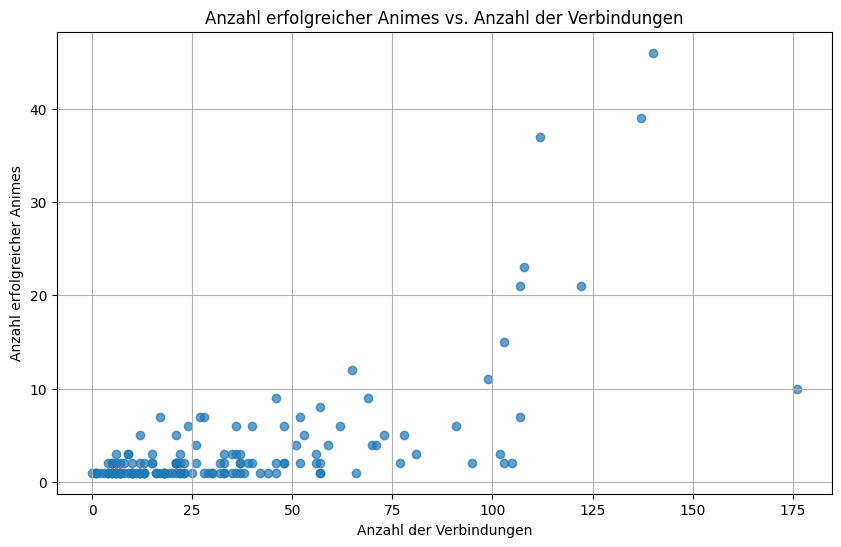

Spearman-Korrelationskoeffizient Ratio: -0.6968256160276387
P-Wert: 7.941621685533349e-23


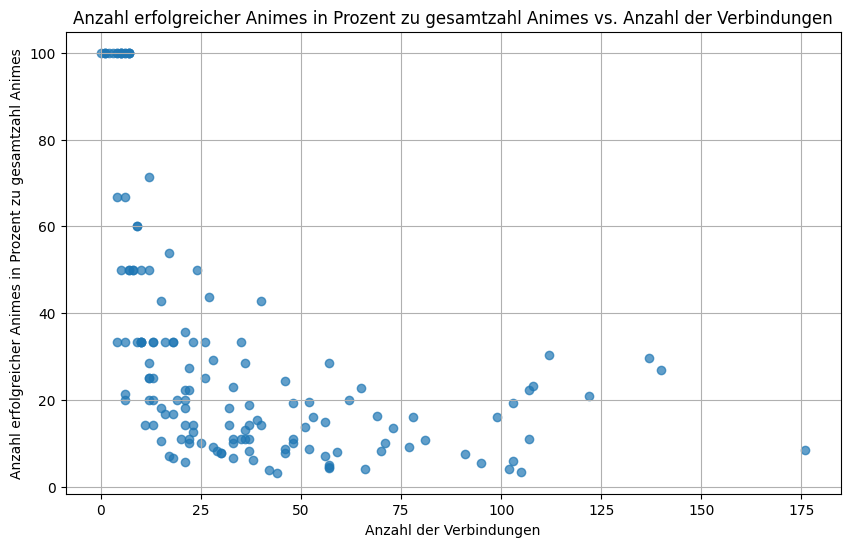

In [65]:
# Spearman-Korrelation berechnen Successful Animes
correlation, p_value = spearmanr(endmerge['successful_count'], endmerge['degree_x'])

print(f'Spearman-Korrelationskoeffizient Successful Animes: {correlation}')
print(f'P-Wert: {p_value}')

# Streudiagramm erstellen Successful Animes
plt.figure(figsize=(10, 6))
plt.scatter(endmerge['degree_x'], endmerge['successful_count'], alpha=0.7)
plt.title('Anzahl erfolgreicher Animes vs. Anzahl der Verbindungen')
plt.xlabel('Anzahl der Verbindungen')
plt.ylabel('Anzahl erfolgreicher Animes')
plt.grid(True)
plt.show()

# Spearman-Korrelation berechnen Ratio
correlation, p_value = spearmanr(endmerge['ratio'], endmerge['degree_x'])

print(f'Spearman-Korrelationskoeffizient Ratio: {correlation}')
print(f'P-Wert: {p_value}')

# Streudiagramm erstellen Ratio
plt.figure(figsize=(10, 6))
plt.scatter(endmerge['degree_x'], endmerge['ratio'], alpha=0.7)
plt.title('Anzahl erfolgreicher Animes in Prozent zu gesamtzahl Animes vs. Anzahl der Verbindungen')
plt.xlabel('Anzahl der Verbindungen')
plt.ylabel('Anzahl erfolgreicher Animes in Prozent zu gesamtzahl Animes')
plt.grid(True)
plt.show()

Die Anzahl der Verbindungen (Degree Centrality) wurde erfolgreich berechnet und den Produzenten zugeordnet. Zum Beispiel hat „HoriPro International“ zwei Verbindungen.